## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

### Word to Vector (Word2Vec)

CBoW and Skip Gram algorithms are used to build a neural vector model for the corpus. 
This is a purely didactical example, as the dataset is too small to obtain a meaningfull model (we will later use pre-trained Word2Vec models based on billions of words). 

- Gensim Word2Vec embedding modeling. 

<hr>

[More about Word2Vec](https://en.wikipedia.org/wiki/Word2vec)

[Gensim Word2Vec Embeddings](https://radimrehurek.com/gensim/models/word2vec.html)


In [1]:
import pandas as pd 
import numpy as np
import ast

## Load features dataset
- Data is already pre-processed (1-Preprocessing). 
- Basic NLP features are already calculated (2-Features). 
- Some additional BoW features have been added (3-BoW).
- Some additional TF/IDF features have been added (3-TFIDF).
- N-Gram models have been generated (3-N-Grams). 
- PoS lists for each document identified (4-Lexicosemantics). 
- Writer's personality variables inferred (5-Personality).
- Sentiment analysis (6-Sentiment). 
- Topic modeling with LSA (7-LatentSemantic). 
- Topic modeling using LDA (8-LantentDirichletAllocation).

In [2]:
feats_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/data/Prolexitim_v2_features_8.csv"
alex_df = pd.read_csv(feats_dataset_path, header=0, delimiter=";")

In [3]:
alex_df.sample(2)

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,AFINN_Words_Int,AFINN_Stems_Int,AFINN_Words_Max,AFINN_Stems_Max,Watson_Sent,Clean_Text,LDA4_Umap2_0,LDA4_Umap2_1,LDA10_Topic,LDA4_Topic
243,f0b6d248520d5d24a7553a41ee5faaa9,38,11,15,12,2,27,9VH,0,1,...,0.0,2.0,0,3,0.000000,4 amigos trabajaban campo después comer gustab...,2.431508,11.441517,3,1
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,...,2.5,0.0,5,0,-0.946776,hombre llorando mujer muerto,6.839204,6.678424,2,2


In [5]:
alex_df.columns[0:30]

Index(['Code', 'TAS20', 'F1', 'F2', 'F3', 'Gender', 'Age', 'Card',
       'T_Metaphors', 'T_ToM', 'T_FP', 'T_Interpret', 'T_Desc', 'T_Confussion',
       'Text', 'Alex_A', 'Alex_B', 'Words', 'Sentences', 'Tokens',
       'Tokens_Stop', 'Tokens_Stem_P', 'Tokens_Stem_S', 'POS', 'NER', 'DEP',
       'Lemmas_CNLP', 'Lemmas_Spacy', 'Chars', 'avgWL'],
      dtype='object')

## Word2Vec model training

In [4]:
import gensim 
from gensim.models import Word2Vec

In [15]:
# Corpus with all words
corpus = []
for token_list in alex_df.Tokens:
    tlist = ast.literal_eval(token_list)
    corpus.append(tlist)

In [16]:
len(corpus)

338

### Build CBOW model (Continuous Bag of Words)
- [About CBOW](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html)

In [17]:
# Create CBOW model with 100 dimensions
CBOW_model = gensim.models.Word2Vec(corpus, min_count=1, size=100, window=5)

C:\Users\array\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


### Build Skip Gram model 
- [About Skip Gram](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html)

In [19]:
# Create Skip Gram model with 100 features
SGram_model = gensim.models.Word2Vec(corpus, min_count=1, size=100, window=5, sg=1)

## Check vectors and explore cosine similarities

In [23]:
# Check Cosine similarities 

print("Cosine similarity between 'violín' and 'instrumento' - CBOW : ", 
      CBOW_model.wv.similarity('violín', 'instrumento')) 
      
print("Cosine similarity between 'violín' and 'instrumento' - Skip Gram : ", 
      SGram_model.wv.similarity('violín', 'instrumento')) 

Cosine similarity between 'violín' and 'instrumento' - CBOW :  0.9962608
Cosine similarity between 'violín' and 'instrumento' - Skip Gram :  0.9992332


In [25]:
CBOW_model.wv.get_vector("violín")

array([ 0.29244602,  0.1571419 ,  0.0918668 , -0.13128419, -0.21447843,
       -0.1487758 , -0.1620015 ,  0.10710779,  0.15090078, -0.01287215,
       -0.05963194, -0.11444826,  0.05621286,  0.05704926,  0.07773339,
        0.16686487, -0.04587783, -0.07569016,  0.28466064, -0.21364225,
       -0.1801999 , -0.0522386 , -0.12933666, -0.05156904,  0.11363473,
        0.07320063, -0.10153467,  0.14643365,  0.10016821, -0.09168043,
        0.15553322, -0.06732301, -0.08380783,  0.17626415,  0.02585599,
        0.05051834, -0.09761046,  0.17386656,  0.2404321 , -0.04556042,
       -0.07877262, -0.17528301,  0.06763187, -0.04869478,  0.00282754,
        0.21626337, -0.07279824,  0.11088295,  0.06934138, -0.04653389,
        0.0418728 ,  0.01511082, -0.04880616, -0.02961778,  0.11909728,
       -0.05632914,  0.01175185,  0.03766964, -0.13897756,  0.06291847,
        0.0082241 , -0.12766631, -0.07382265,  0.24148482,  0.03127281,
       -0.08433388,  0.0040065 ,  0.04361234,  0.00538581,  0.08

### Embeddings visualization

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [30]:
lexicon = list(SGram_model.wv.vocab) 

In [39]:
allWordVectors = SGram_model.wv[lexicon]

In [41]:
allWordVectors.shape

(2704, 100)

In [42]:
# Reduce dimensionality to 2D
tsne = TSNE(n_components=2)
tsne_2D = tsne.fit_transform(allWordVectors)

In [43]:
# fd with 2D projections of vectors
df_2D = pd.DataFrame(tsne_2D, index=lexicon, columns=['tsne_0', 'tsne_1'])

In [46]:
df_2D.sample(5)

,tsne_0,tsne_1
tuviera,-0.211909,21.403828
uno,-19.046768,54.156883
viajando,10.686576,1.535873
extraordinaria,-28.513630,-18.674440
otras,45.910095,6.376145


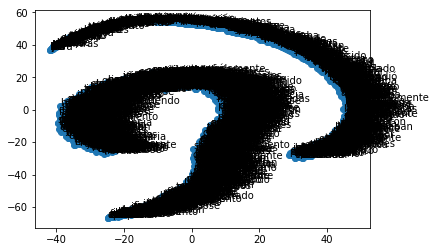

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_2D['tsne_0'], df_2D['tsne_1'])

for word, pos in df_2D.iterrows():
    ax.annotate(word, pos)
    
plt.show()

In [66]:
sample_df = df_2D.sample(30)

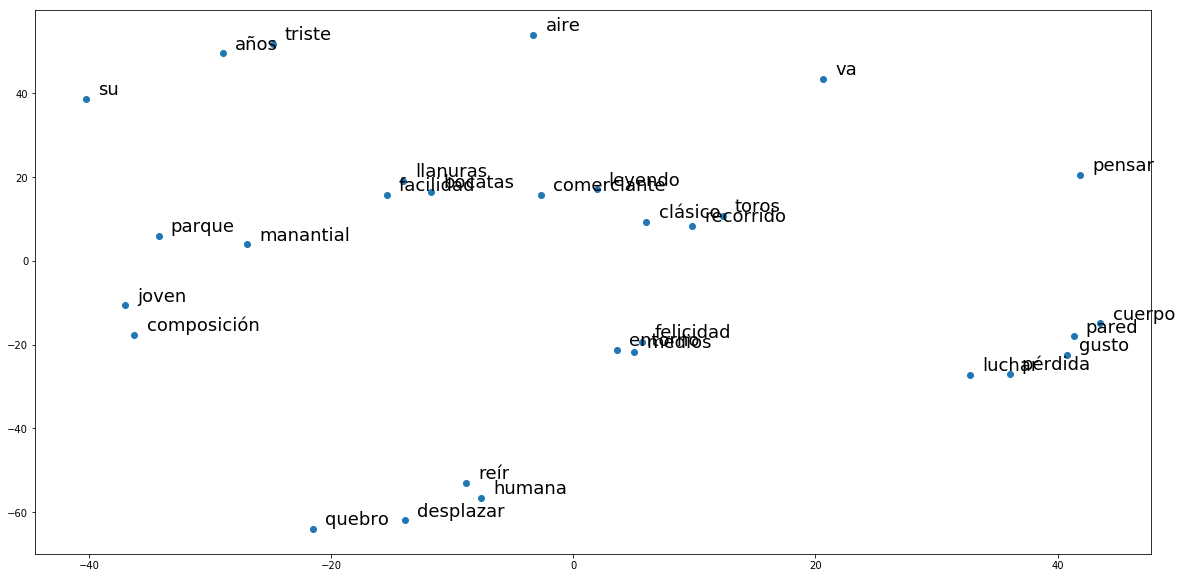

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(sample_df['tsne_0'], sample_df['tsne_1'])

for word, pos in sample_df.iterrows():
    ax.annotate(word, pos+1, fontsize=18)
    
plt.show()

## Save models for further use
- Just for demonstration purposes. 
- We're not going to use these models as they are extremely poor, due to training with such a small corpus. 

In [26]:
models_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\"
SGram_model.wv.save_word2vec_format( models_path + "Word2Vec_SGram_Prolex_v2.bin", binary=True)
SGram_model.save( models_path + "Word2Vec_SGram_Prolex_v2.model")
CBOW_model.wv.save_word2vec_format( models_path + "Word2Vec_CBOW_Prolex_v2.bin", binary=True)
CBOW_model.save( models_path + "Word2Vec_CBOW_Prolex_v2.model")